# Task 2

### 2.1 import necessary library

In [8]:
import json
import matplotlib.pyplot as plt
import numpy as np

### 2.2 define function for validated float and integer number

In [9]:
# Function to validate and get a float input from the user
def get_validated_float(prompt: str) -> float:
    """Prompts the user for a float and validates the input."""
    while True:
        try:
            value = float(input(prompt))
            if value >= 0:
                return value
            else:
                print("⚠️ Please enter a non-negative number.")
        except ValueError:
            print("❌ Invalid input. Please enter a valid number.")


# Function to validate and get a positive integer input from the user
def get_validated_int(prompt: str) -> int:
    """Prompts the user for an integer and validates the input."""
    while True:
        try:
            value = int(input(prompt))
            if value > 0:
                return value
            else:
                print("⚠️ Please enter a positive whole number.")
        except ValueError:
            print("❌ Invalid input. Please enter a valid whole number.")


### 2.3 define calculations functions

In [10]:

def calculate_future_value(p: float, c: float, r: float, t: int, n: int = 12) -> float:
    """
    Calculates the future value of a portfolio with monthly contributions.
    
    Args:
        p: Principal (current balance).
        c: Monthly contribution.
        r: Annual interest rate (as a decimal, e.g., 0.07 for 7%).
        t: Number of years.
        n: Number of times interest is compounded per year.
    
    Returns:
        The projected future value of the portfolio.
    """
    rate_per_period = r / n
    total_periods = n * t
    
    # Growth of the initial principal
    fv_principal = p * (1 + rate_per_period)**total_periods
    
    # Growth of the series of monthly contributions (Future Value of an Annuity)
    if rate_per_period > 0:
        fv_contributions = c * (((1 + rate_per_period)**total_periods - 1) / rate_per_period)
    else: # Handle the case of 0% return
        fv_contributions = c * total_periods
        
    return fv_principal + fv_contributions

def calculate_monthly_annuity(pv: float, r: float = 0.04, t: int = 20, n: int = 12) -> float:
    """
    Calculates the fixed monthly payment from an annuity.
    
    Args:
        pv: Present Value (the total retirement fund).
        r: Annual interest rate of the annuity.
        t: Term of the annuity in years.
        n: Number of payments per year.
        
    Returns:
        The estimated monthly income.
    """
    rate_per_period = r / n
    total_payments = n * t
    
    if rate_per_period > 0:
        monthly_income = pv * (rate_per_period * (1 + rate_per_period)**total_payments) / ((1 + rate_per_period)**total_payments - 1)
    else: # Handle case of 0% interest on annuity
        monthly_income = pv / total_payments
        
    return monthly_income

### 2.4 display results

In [11]:
def display_results(projected_value: float, monthly_income: float):
    """Displays the results in both plain text and JSON format."""
    
    # --- Plain Text Output ---
    print(f"Projected Value at Retirement: ${projected_value:,.2f}")
    print(f"Estimated Monthly Income: ${monthly_income:,.2f}")
    
    # --- JSON Output ---
    json_output = {
        "projected_value": round(projected_value, 2),
        "monthly_income": round(monthly_income, 2)
    }
    print("\n--- JSON Output ---")
    # Use indent for pretty printing
    print(json.dumps(json_output, indent=4))

### 2.5 define bonus simulation

In [12]:
def run_bonus_simulation(p, c, base_rate, t):
    """Runs a 3-scenario simulation and plots the results."""
    print("\n--- ✨ Bonus: 3-Scenario Simulation ---")
    
    # Define scenarios
    scenarios = {
        "Conservative": base_rate - 0.02, # 2% lower than base
        "Base": base_rate,
        "Optimistic": base_rate + 0.02   # 2% higher than base
    }
    
    plt.figure(figsize=(10, 6))
    
    # Calculate and plot growth for each scenario
    for name, rate in scenarios.items():
        # Ensure rate is not negative
        actual_rate = max(rate, 0) 
        
        # Calculate values for each year to plot the growth curve
        years = np.arange(0, t + 1)
        values = [calculate_future_value(p, c, actual_rate, year) for year in years]
        
        plt.plot(years, values, label=f"{name} ({actual_rate:.1%})")

        # Display final values for each scenario
        final_value = values[-1]
        print(f"[{name}] Projected Value: ${final_value:,.2f}")

    # --- Plot Formatting ---
    plt.title("Retirement Portfolio Growth Scenarios", fontsize=16)
    plt.xlabel("Years from Now", fontsize=12)
    plt.ylabel("Portfolio Value ($)", fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.legend()
    # Format the y-axis to show currency
    plt.gca().get_yaxis().set_major_formatter(
        plt.FuncFormatter(lambda x, p: f'${x:,.0f}')
    )
    plt.tight_layout()
    plt.show()

### 2.6 run the application

Projected Value at Retirement: $1,260,553.48
Estimated Monthly Income: $7,638.71

--- JSON Output ---
{
    "projected_value": 1260553.48,
    "monthly_income": 7638.71
}

--- ✨ Bonus: 3-Scenario Simulation ---
[Conservative] Projected Value: $854,597.36
[Base] Projected Value: $1,260,553.48
[Optimistic] Projected Value: $1,904,396.36


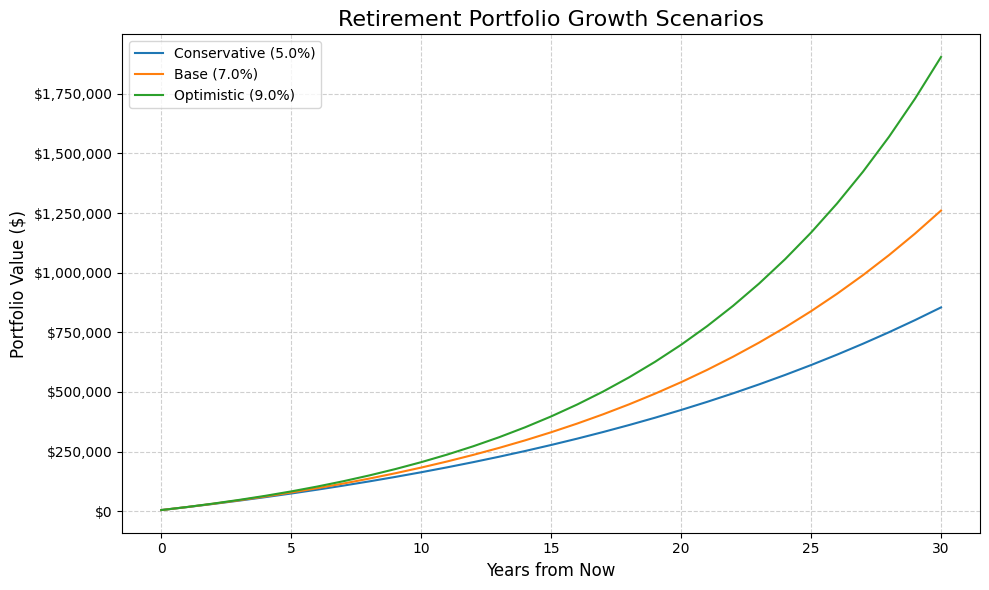

In [13]:
def main():

    # 1. Get Inputs from user
    current_balance = get_validated_float("Enter your current portfolio balance: ")
    monthly_contribution = get_validated_float("Enter your monthly contribution: ")
    annual_return_pct = get_validated_float("Enter your expected annual return rate in % (e.g., 7): ")
    years_to_retirement = get_validated_int("Enter years until retirement: ")
    
    # Convert percentage to decimal
    annual_return_rate = annual_return_pct / 100.0
    
    # 2. Perform Base Calculation
    projected_balance = calculate_future_value(
        p=current_balance,
        c=monthly_contribution,
        r=annual_return_rate,
        t=years_to_retirement
    )
    
    estimated_income = calculate_monthly_annuity(pv=projected_balance)
    
    # 3. Display Outputs
    display_results(projected_balance, estimated_income)
    
    # 4. Run Optional Bonus
    run_bonus = input("\nWould you like to run a 3-scenario simulation with a chart? (yes/no): ").lower()
    if run_bonus in ['yes', 'y']:
        run_bonus_simulation(
            p=current_balance,
            c=monthly_contribution,
            base_rate=annual_return_rate,
            t=years_to_retirement
        )
    

# Entry point of the script
if __name__ == "__main__":
    main()